# Data Analysis Of Chelsea's Premier League Campaigns from 2006 to 2018

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

In [4]:
results=pd.read_csv('results.csv')
stats=pd.read_csv('stats.csv')

In [5]:
results.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [6]:
stats=stats[stats.team=='Chelsea']
stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
21,Chelsea,25.0,3.0,65.0,63.0,5.0,605.0,199.0,12.0,10.0,...,945.0,253.0,26290.0,NaN,8.0,687.0,0.0,62.0,19.0,2007-2008
41,Chelsea,25.0,5.0,68.0,50.0,3.0,797.0,248.0,17.0,12.0,...,938.0,237.0,29962.0,NaN,3.0,518.0,1.0,111.0,35.0,2008-2009
60,Chelsea,27.0,6.0,103.0,54.0,5.0,834.0,288.0,13.0,16.0,...,1083.0,286.0,28914.0,NaN,3.0,503.0,1.0,87.0,30.0,2009-2010
81,Chelsea,21.0,9.0,69.0,59.0,1.0,745.0,244.0,21.0,12.0,...,995.0,257.0,27426.0,70.0,7.0,573.0,1.0,84.0,22.0,2010-2011


In [7]:
stats.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

## Missing Values

In [8]:
results.isnull().sum()

home_team     0
away_team     0
home_goals    0
away_goals    0
result        0
season        0
dtype: int64

In [9]:
stats.isnull().sum()

team                    0
wins                    0
losses                  0
goals                   0
total_yel_card          0
total_red_card          0
total_scoring_att       0
ontarget_scoring_att    0
hit_woodwork            0
att_hd_goal             0
att_pen_goal            0
att_freekick_goal       0
att_ibox_goal           0
att_obox_goal           0
goal_fastbreak          0
total_offside           0
clean_sheet             0
goals_conceded          0
saves                   1
outfielder_block        0
interception            0
total_tackle            0
last_man_tackle         0
total_clearance         0
head_clearance          1
own_goals               0
penalty_conceded        0
pen_goals_conceded      0
total_pass              0
total_through_ball      1
total_long_balls        0
backward_pass           4
total_cross             0
corner_taken            0
touches                 0
big_chance_missed       4
clearance_off_line      0
dispossessed            1
penalty_save

<AxesSubplot:>

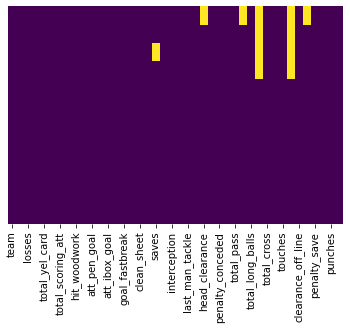

In [10]:
sns.heatmap(stats.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are some missing values for backward_pass, big_chance_missed etc. in the seasons before 2010.  

# Points


In [11]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(16,6)

(0.0, 100.0)

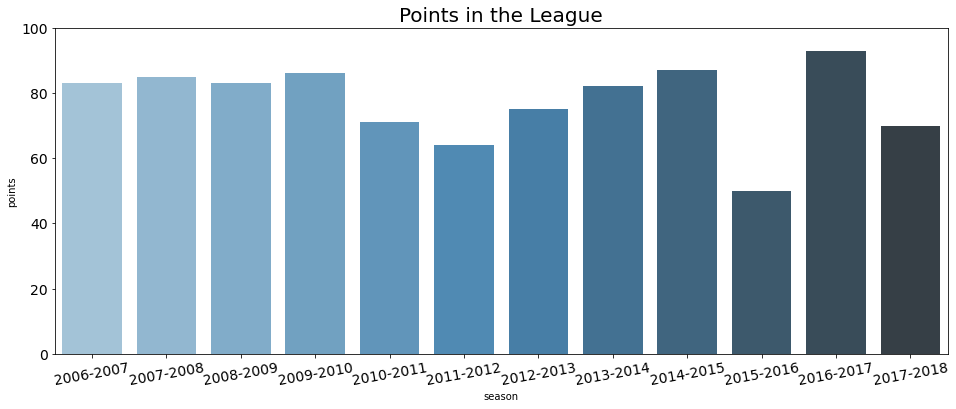

In [12]:
points=stats.groupby(['wins','losses','season'],sort=False).size().reset_index().rename(columns={0:'points'})
points['points']=3*points['wins'] + (38-points['wins']-points['losses'])
sns.barplot(x='season',y='points',data=points, palette="Blues_d")
plt.xticks(rotation=10, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Points in the League', fontsize = 20)


plt.ylim(0,100)

From 2006 to 2010 Chelsea participated in the title race every season with a minimum of 80 points. After that time the club underperformed for a few years in the league. The reason could be the departure of some big players and the rebuilding of the squad. In 2013/2014 Jose Mourinho returned and brought the success back to the club. Chelsea won the league in 14/15 and 16/17 after that period. 

# Wins And Losses

In [13]:
wins_data=stats[['wins','season']]
losses_data=stats[['losses','season']]

Text(2016-2017, 1, 'Arrival of Conte')

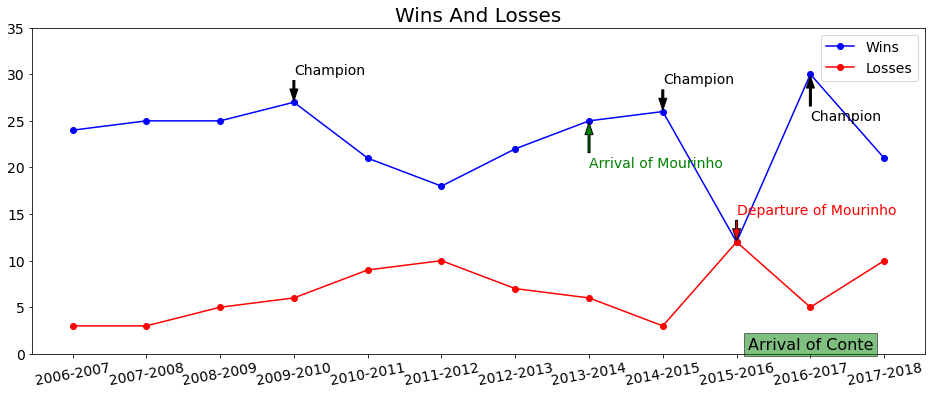

In [15]:
plt.plot(wins_data.season, wins_data.wins, label = 'Wins', marker='o',color='blue') 
plt.plot(losses_data.season, losses_data.losses, label = 'Losses', marker='o',color='red') 
plt.ylim(0,35)
plt.grid(which='minor', axis='y', linestyle='-.', linewidth=1) 
plt.xticks(rotation=10, fontsize=14) 
plt.yticks(fontsize=14) 
plt.legend(fontsize=14) 
plt.title('Wins And Losses', fontsize = 20)

plt.annotate('Champion', xy=('2009-2010',27), xytext=('2009-2010', 30),arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8), fontsize =14) 
plt.annotate('Champion', xy=('2014-2015',26), xytext=('2014-2015', 29),arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8), fontsize =14) 
plt.annotate('Champion', xy=('2016-2017',30), xytext=('2016-2017', 25),arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8), fontsize =14) 

plt.annotate('Arrival of Mourinho', xy=('2013-2014',25), xytext=('2013-2014', 20),arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=8), fontsize =14,color='green') 
plt.annotate('Departure of Mourinho', xy=('2015-2016',12), xytext=('2015-2016', 15),arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8), fontsize =14,color='red') 

plt.text('2016-2017',1,'Arrival of Conte', horizontalalignment='center', verticalalignment='center', fontsize =16, bbox=dict(facecolor='green', alpha=0.5)) 

In 2015/2016 the wins are equal to the losses and Chelsea finished on 10th place in the table. After Mourinho's departure in this season Antonio Conte stepped in and changed the team. Due to that change Chelsea became champion again.

# Home Games vs. Away Games

In [45]:
import warnings
warnings.filterwarnings("ignore")

home_games=results[results.home_team=='Chelsea']
away_games=results[results.away_team=='Chelsea']

home_games['result']=home_games['result'].replace({'H': 'Win', 'D': 'Draw', 'A': 'Loss'}, regex=True)
away_games['result']=away_games['result'].replace({'H': 'Loss', 'D': 'Draw', 'A': 'Win'}, regex=True)

In [46]:
home_index=home_games.result.value_counts().index
home_value=home_games.result.value_counts().values

away_index=away_games.result.value_counts().index
away_value=away_games.result.value_counts().values

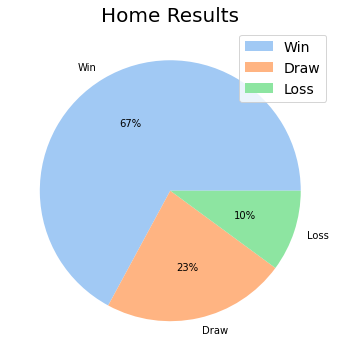

In [47]:
colors = sns.color_palette('pastel')[0:5]

plt.pie(home_value, labels = home_index, colors = colors, autopct='%.0f%%')
plt.legend(fontsize=14) 
plt.title('Home Results', fontsize = 20)
plt.show()

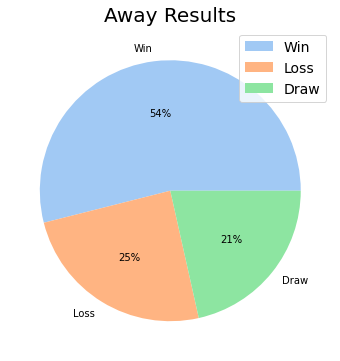

In [48]:
plt.pie(away_value, labels = away_index, colors = colors, autopct='%.0f%%')
plt.legend(fontsize=14) 
plt.title('Away Results', fontsize = 20)
plt.show()

Conclusion: Home games have higher win percentages than away games.

# Home Games vs. Away Games Against The "Big Six" Teams

Manchester United, Liverpool, Arsenal, Chelsea, Manchester City and Tottenham are considered the 'Big Six' in the Premier League. It is because they are the most consistently successful teams in the division. Not only that, but they boast the biggest stadiums, broadest fanbases and, as a result, the healthiest bank accounts. [ For more informations: https://www.goal.com/en-us/news/who-are-premier-league-big-six-top-english-clubs-nickname/130iokmi8t8dt1k3kudou73s1k ]

In [33]:
big_six=['Liverpool','Manchester City','Manchester United','Arsenal','Tottenham Hotspur']
big_six_home=home_games.loc[home_games.away_team.isin(big_six)]
big_six_away=away_games.loc[away_games.home_team.isin(big_six)]

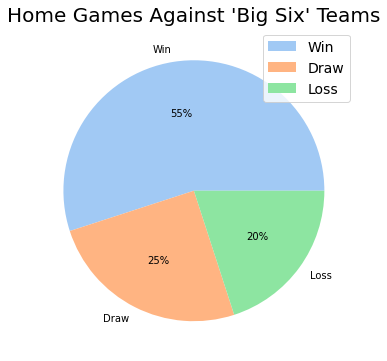

In [34]:
h_index=big_six_home.result.value_counts().index
h_value=big_six_home.result.value_counts().values

plt.pie(h_value, labels = h_index, colors = colors, autopct='%.0f%%')
plt.title("Home Games Against 'Big Six' Teams",fontsize=20)
plt.legend(fontsize=14) 
plt.show()

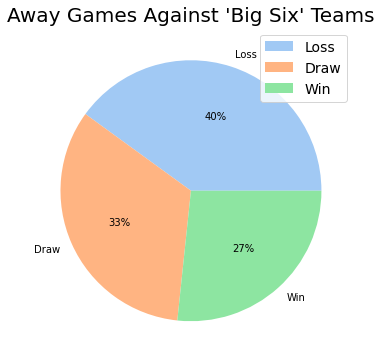

In [35]:
a_index=big_six_away.result.value_counts().index
a_value=big_six_away.result.value_counts().values

plt.pie(a_value, labels = a_index, colors = colors, autopct='%.0f%%')
plt.legend(fontsize=14) 
plt.title("Away Games Against 'Big Six' Teams",fontsize=20)
plt.show()

* Chelsea wins 55% of the home games against the "Big Six" teams but only 27% of the away games
* A home game against a "Big Six" team has in average the same result as an ordinary away game in the Premiere League for Chelsea